# Brain Tumor Detection Using YOLOv8
**This project uses YOLOv8 for brain tumor detection and segmentation in medical images**

# NVIDIA GPU Info and Current Working Directory

In [ ]:
!nvidia-smi

Wed Dec 25 11:02:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8 and Roboflow Libraries

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Roboflow Dataset Setup

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OPznbicloVnScAQ5SrRN")
project = rf.workspace("firstworkspace-qsq1i").project("braintumordetection-agfcl")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BrainTumorDetection-3 in yolov8:: 100%|██████████| 8578/8578 [00:01<00:00, 4366.50it/s]


# Custom Training with YOLOv8

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data="/content/BrainTumorDetection-3/data.yaml" epochs=25 imgsz=800

/content
100% 22.8M/22.8M [00:00<00:00, 118MB/s] 
New https://pypi.org/project/ultralytics/8.3.54 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/BrainTumorDetection-3/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fa

# Display Confusion Matrix and Results

/content


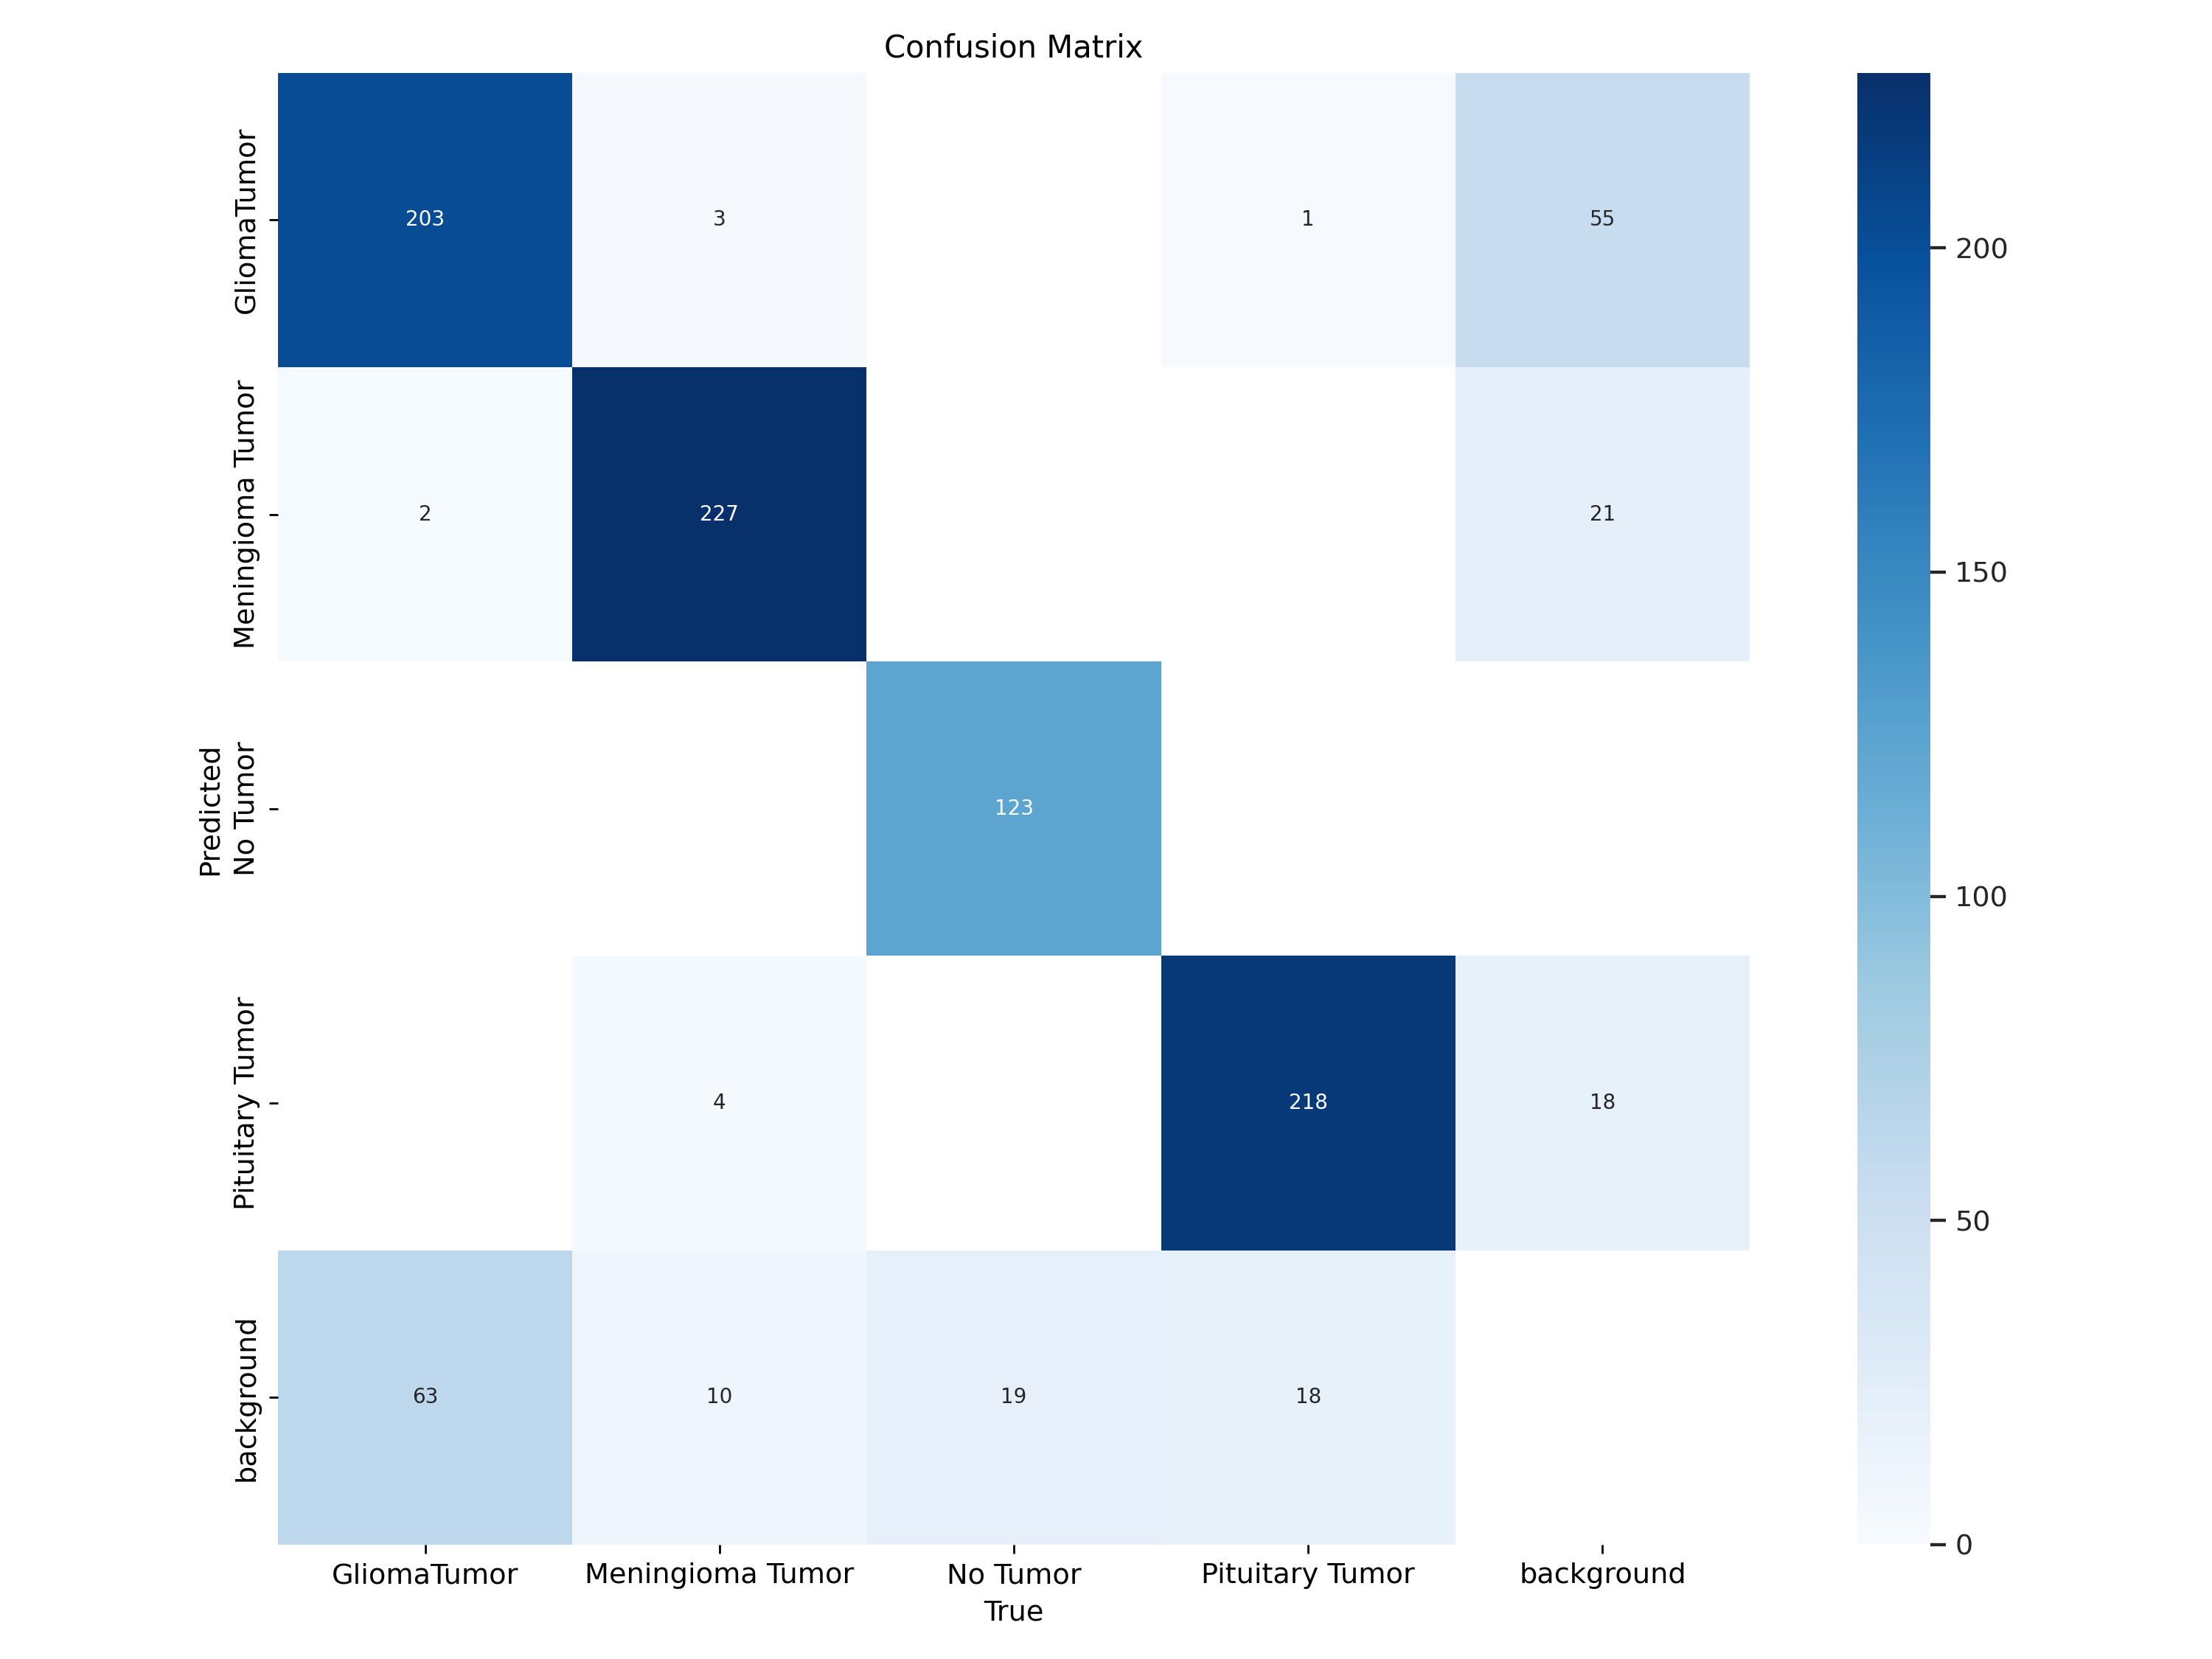

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/segment/train/confusion_matrix.png', width=600)

# Evaluation of the Model with Custom Metrics

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assume predictions and true_labels are your results arrays from instance segmentation
# For example:
predictions = np.array([...])  # Your model's predictions
true_labels = np.array([...])  # The ground truth labels

# Remove background (assuming background label is 0, adjust accordingly)
predictions_no_bg = predictions[predictions != 0]
true_labels_no_bg = true_labels[true_labels != 0]

# Ensure the arrays match in size after removing backgrounds
indices = (predictions != 0) & (true_labels != 0)
predictions_no_bg = predictions[indices]
true_labels_no_bg = true_labels[indices]


# Show Training Results

/content


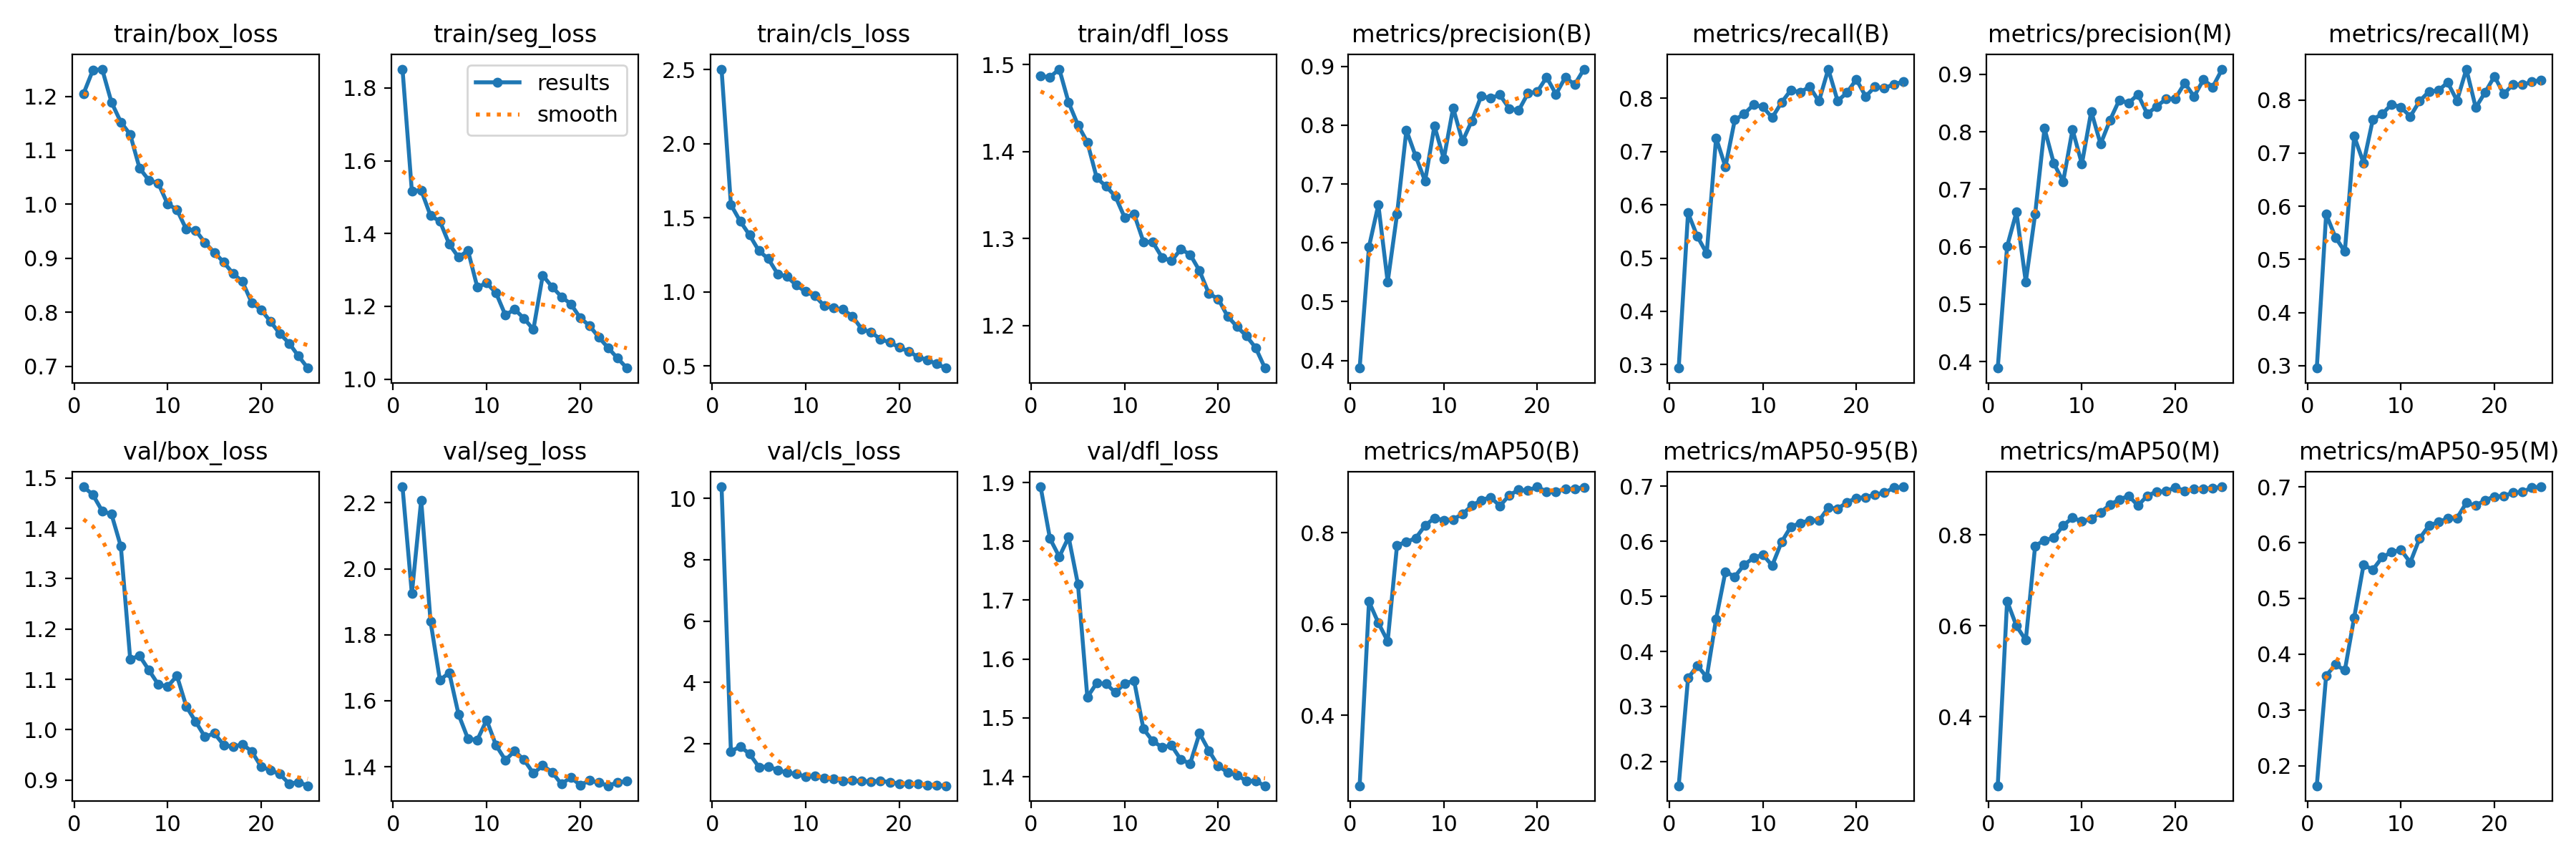

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/segment/train/results.png', width=600)

/content


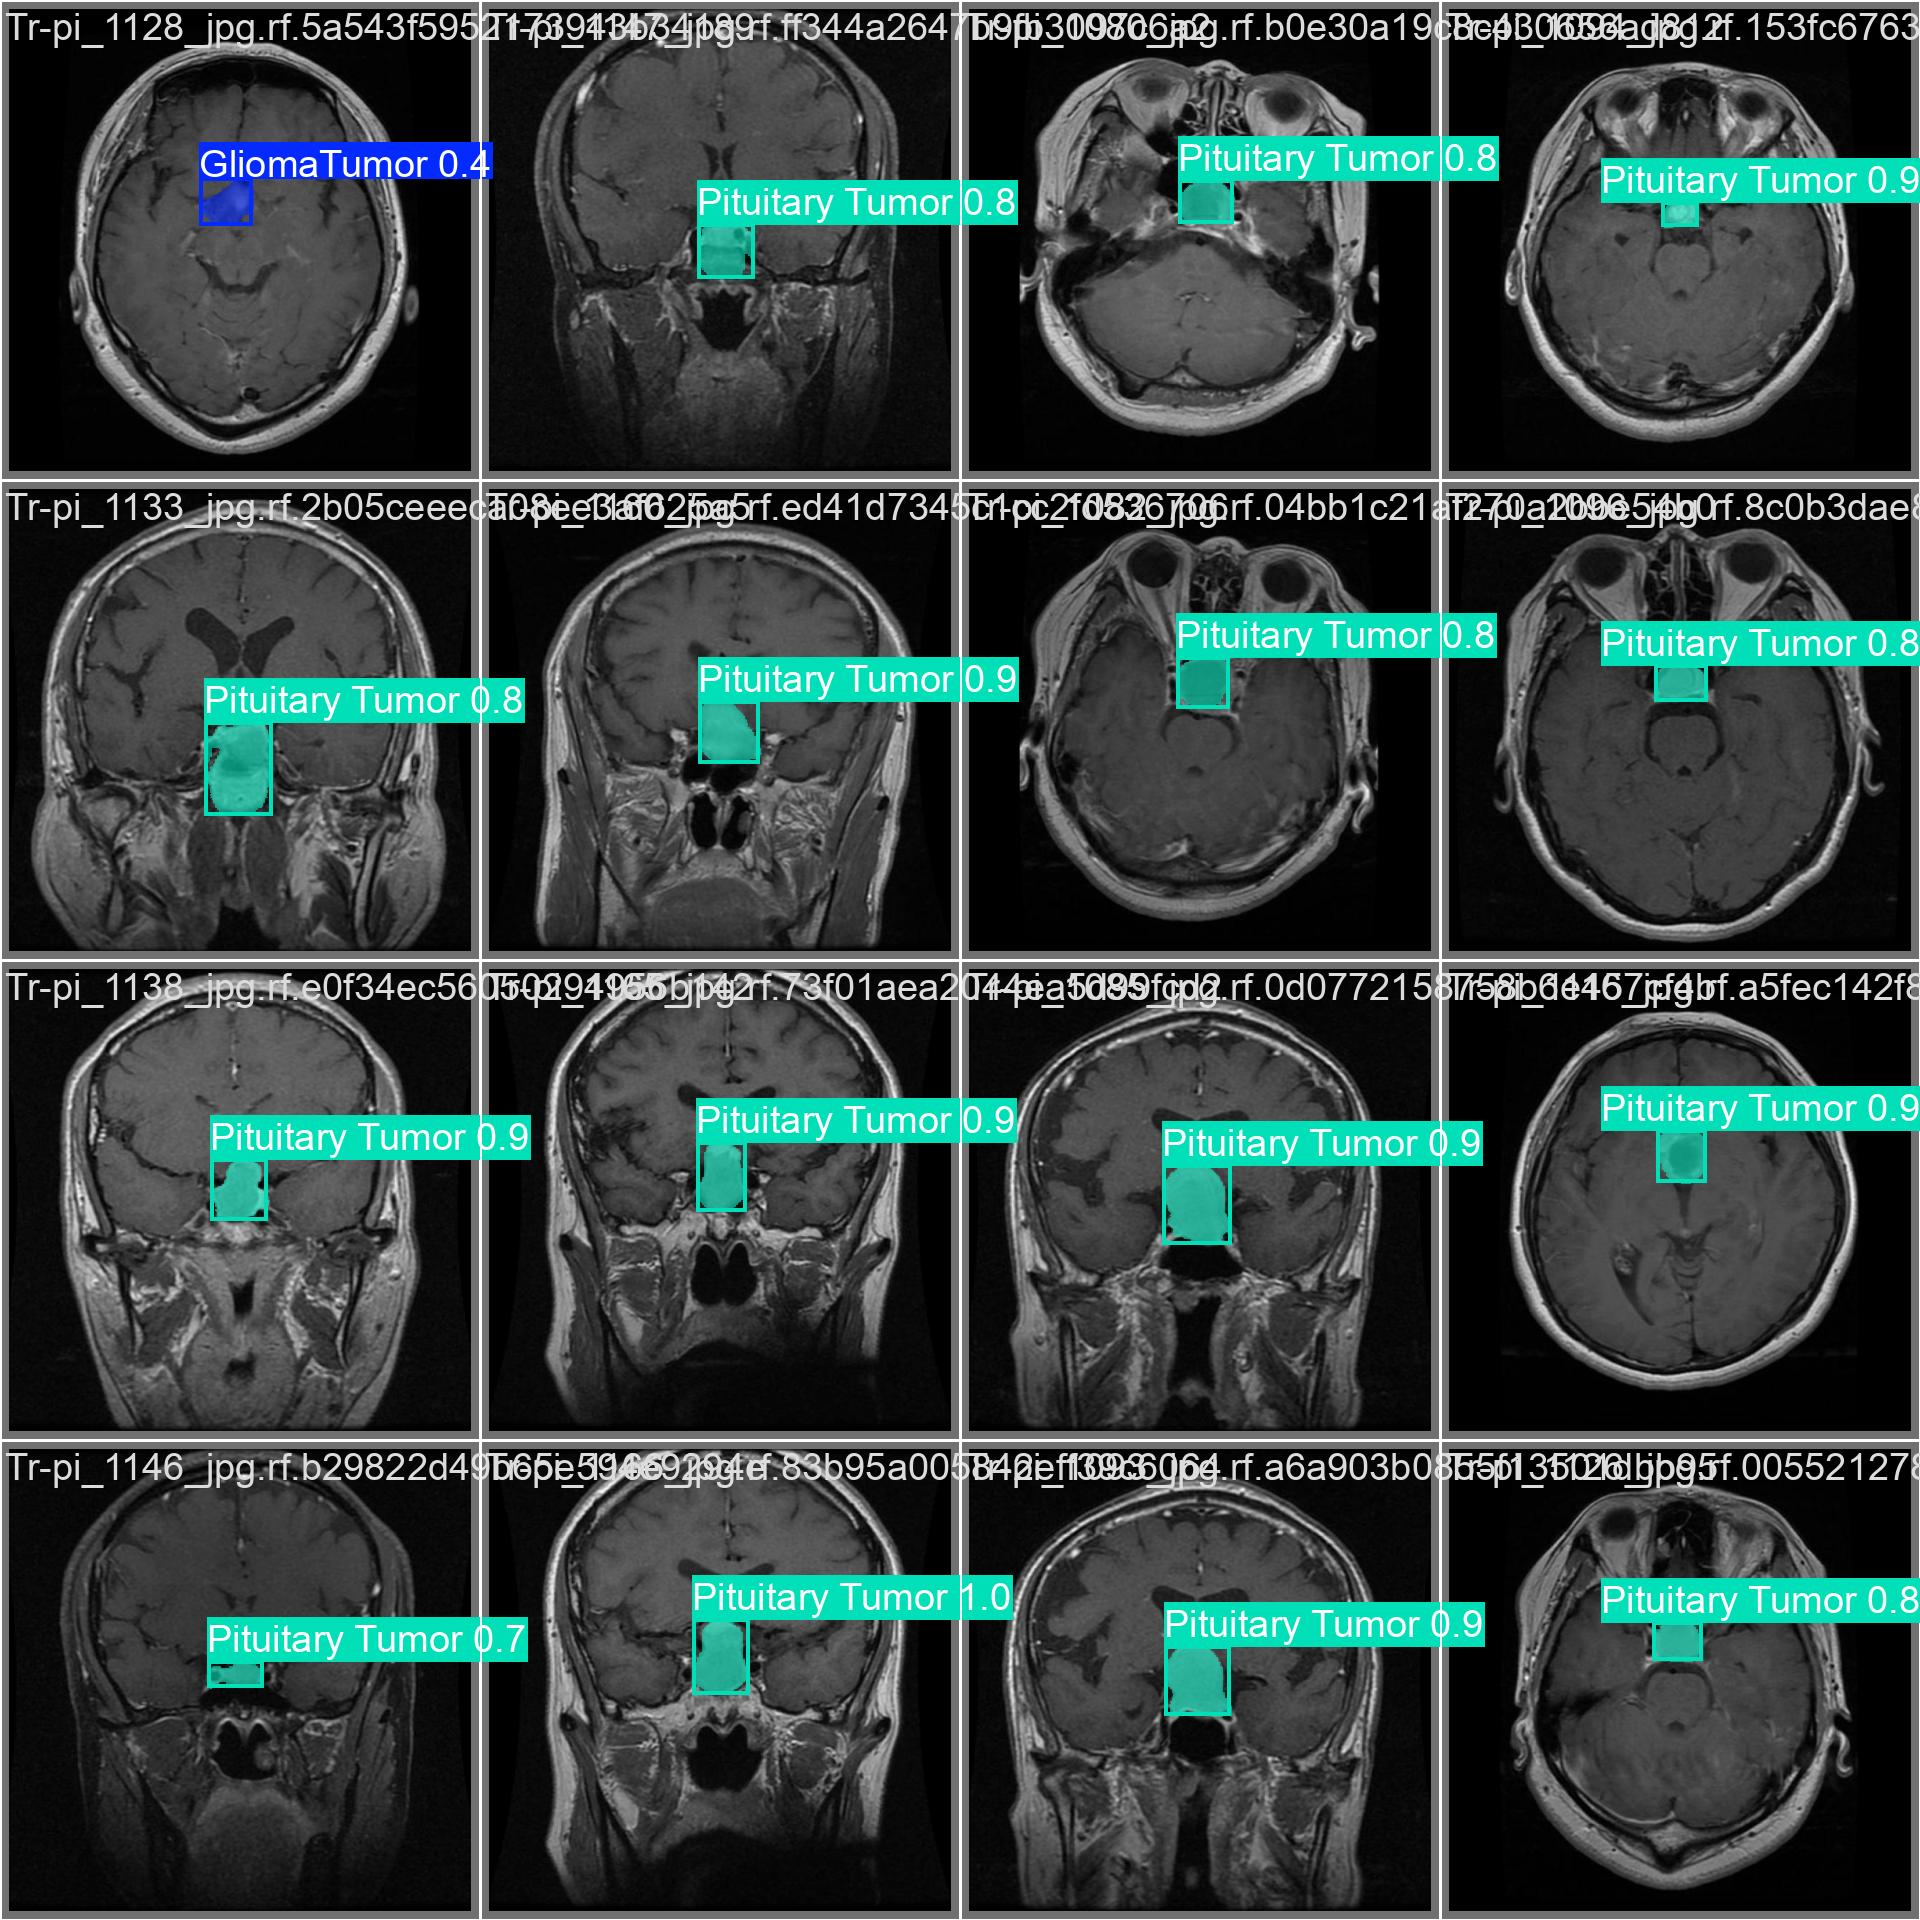

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/segment/train/val_batch0_pred.jpg', width=600)

# Model Validation

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data=/content/BrainTumorDetection-3/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,781,148 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/BrainTumorDetection-3/valid/labels.cache... 858 images, 2 backgrounds, 0 corrupt: 100% 858/858 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 54/54 [00:22<00:00,  2.38it/s]
                   all        858        891      0.897      0.832      0.901      0.699       0.91      0.837      0.906      0.699
           GliomaTumor        240        268      0.757      0.672      0.722      0.467      0.777      0.675      0.728      0.459
      Meningioma Tumor        240        244       0.92      0.926      0.963      0.827      0.938      0.943      0.968      0.829
              No Tumor        141        142          1      0.831      0.991      0.814          1      0.825

# Inference with the Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.25 source=/content/BrainTumorDetection-3/test/images save=true

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,781,148 parameters, 0 gradients, 42.4 GFLOPs

image 1/428 /content/BrainTumorDetection-3/test/images/Tr-glTr_0005_jpg.rf.9bea3b4eac572ab61b13faa508cc84e5.jpg: 800x800 3 GliomaTumors, 30.0ms
image 2/428 /content/BrainTumorDetection-3/test/images/Tr-gl_0013_jpg.rf.e96dfdd3f0692a00c2b7cd92ff8ce334.jpg: 800x800 1 GliomaTumor, 30.2ms
image 3/428 /content/BrainTumorDetection-3/test/images/Tr-gl_0022_jpg.rf.8c0ad659ee10a040e53b0a1318202199.jpg: 800x800 1 GliomaTumor, 30.1ms
image 4/428 /content/BrainTumorDetection-3/test/images/Tr-gl_0058_jpg.rf.2391d9c3212c24ac63d714fe752c01fe.jpg: 800x800 1 GliomaTumor, 30.0ms
image 5/428 /content/BrainTumorDetection-3/test/images/Tr-gl_0060_jpg.rf.4c7e35f7c138bf76a63865078a70d8f3.jpg: 800x800 1 GliomaTumor, 25.9ms
image 6/428 /content/BrainTumorDetection-3/test/images/Tr-gl_0062_jpg.rf.d6ba0eca78fd900437c63c3a2bdaf35f

# Display Predicted Images

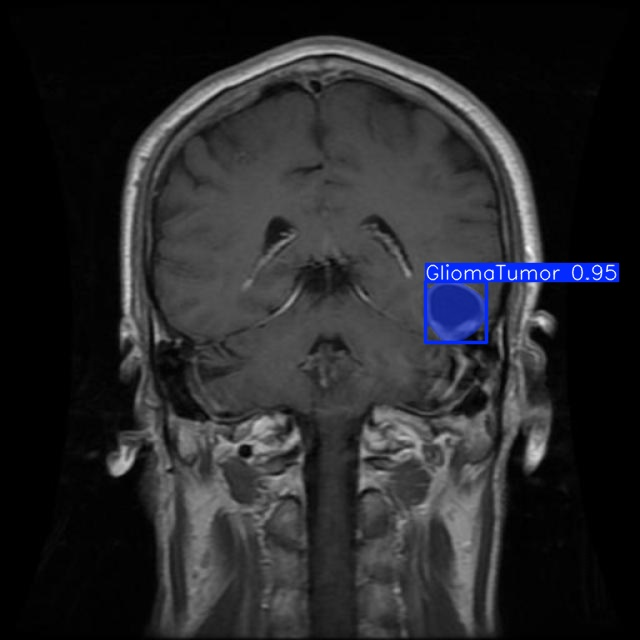

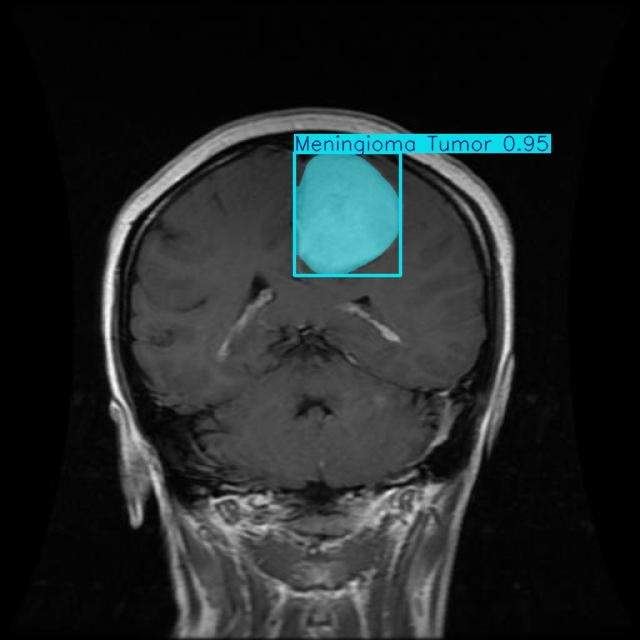

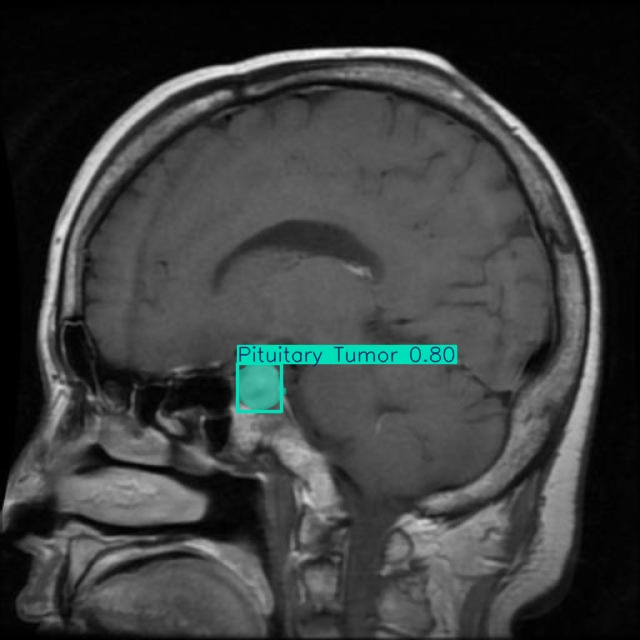

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

# Reinstall YOLOv8 and Deploy Model

In [ ]:
!pip install ultralytics==8.0.196

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.103
    Uninstalling ultralytics-8.2.103:
      Successfully uninstalled ultralytics-8.2.103


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

\Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

# Run Inference on Model via API

In [ ]:
# Run inference on your model on a persistant, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"


# Choose a Random Test Image and Run Inference

In [ ]:

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image).json()
pred

running inference on 0374638_as-2885603_jpg.rf.6c1803fe031371708c4c54ef436e6dc2.jpg


{'predictions': [{'x': 527.5,
   'y': 404.0,
   'width': 521.0,
   'height': 338.0,
   'confidence': 0.9511378407478333,
   'class': 'Rearbumper',
   'points': [{'x': 346.25, 'y': 236.25},
    {'x': 343.75, 'y': 238.125},
    {'x': 343.75, 'y': 239.0625},
    {'x': 341.25, 'y': 240.9375},
    {'x': 341.25, 'y': 241.875},
    {'x': 340.0, 'y': 242.8125},
    {'x': 340.0, 'y': 244.6875},
    {'x': 338.75, 'y': 245.625},
    {'x': 338.75, 'y': 246.5625},
    {'x': 336.25, 'y': 248.4375},
    {'x': 336.25, 'y': 249.375},
    {'x': 335.0, 'y': 250.3125},
    {'x': 335.0, 'y': 253.125},
    {'x': 333.75, 'y': 254.0625},
    {'x': 333.75, 'y': 255.0},
    {'x': 331.25, 'y': 256.875},
    {'x': 331.25, 'y': 257.8125},
    {'x': 330.0, 'y': 258.75},
    {'x': 330.0, 'y': 262.5},
    {'x': 328.75, 'y': 263.4375},
    {'x': 328.75, 'y': 264.375},
    {'x': 326.25, 'y': 266.25},
    {'x': 326.25, 'y': 267.1875},
    {'x': 325.0, 'y': 268.125},
    {'x': 325.0, 'y': 271.875},
    {'x': 321.25, 'y':